In [4]:
import argparse
import os
import sys

import torch
import matplotlib.pyplot as plt     # type: ignore

sys.path.append('/user_data/mmhender/texture_synthesis/code/')
import utilities
# import model
import optimize
import pandas as pd

from utils import default_paths

import numpy as np

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

info_fn = os.path.join(default_paths.stim_root, 'Indep_set_info.csv')
print('\nloading image info from %s\n'%info_fn)
info_df = pd.read_csv(info_fn, index_col=0)


cpu

loading image info from /user_data/mmhender/nsd/stimuli/Indep_set_info.csv



In [7]:
fn_info = os.path.join('/user_data/mmhender/texture_synthesis/rfs/vgg19_rfs_info.npy')
rfs_info = np.load(fn_info, allow_pickle=True).item()    

In [8]:
rfs_info.keys()

dict_keys(['pixel_centers', 'layer_unit_centers', 'layer_names_use', 'layer_inds'])

In [9]:
pixel_centers = rfs_info['pixel_centers']
layer_unit_centers = rfs_info['layer_unit_centers']
res_each_layer = [np.max(l)+1 for l in layer_unit_centers]
layer_names = rfs_info['layer_names_use']
layer_inds = rfs_info['layer_inds']
n_layers = len(layer_names)
n_pix = np.max(pixel_centers)+1

In [10]:
res_each_layer

[256, 128, 64, 32, 16]

In [11]:
root = '/user_data/mmhender/texture_synthesis/'

/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_MaxPool4.npy


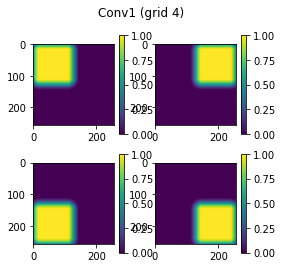

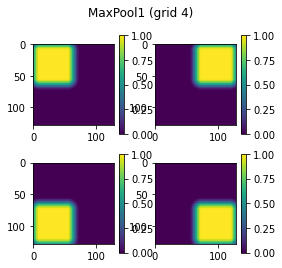

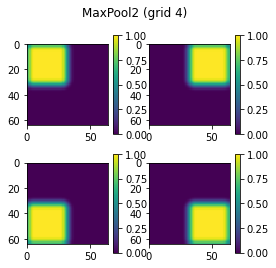

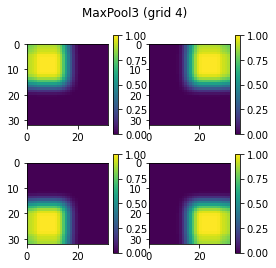

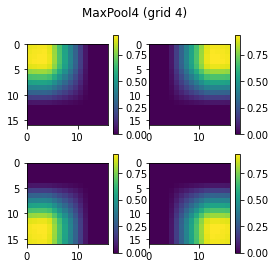

In [32]:
# for which_grid in [1,2,3,4]:
for which_grid in [4]:
# for which_grid in [5]:
# which_grid=[4]:

    n_grid_eachside=2;

    overlap_each_layer = []

    for ll in range(n_layers):

        fn = os.path.join(root,'grid_overlap','vgg19_gridoverlap_grid%d_%dx%d_%s.npy'%(which_grid,
                                                                               n_grid_eachside, \
                                                                        n_grid_eachside, layer_names[ll]))
        print(fn)
        overlap = np.load(fn)
        overlap_each_layer.append(overlap)

    # for ll in [1]:
        
    for ll in range(n_layers):

        overlap = overlap_each_layer[ll]

        res = res_each_layer[ll]

        plt.figure(figsize=(4,4))
        gt = 0;
        for gx in range(n_grid_eachside):
            for gy in range(n_grid_eachside):

                overlap_view = np.reshape(overlap[gt,:], [res,res])
                plt.subplot(n_grid_eachside, n_grid_eachside, gt+1)
                plt.pcolormesh(overlap_view)
                plt.axis('square')
                # plt.axis('off')
                plt.gca().invert_yaxis()
                gt+=1
                plt.colorbar()

        plt.suptitle('%s (grid %d)'%(layer_names[ll], which_grid))

/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_2x2_MaxPool4.npy


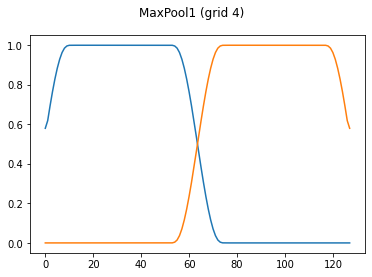

In [35]:
for which_grid in [4]:
    

    n_grid_eachside=2;

    overlap_each_layer = []

    for ll in range(n_layers):

        fn = os.path.join(root,'grid_overlap','vgg19_gridoverlap_grid%d_%dx%d_%s.npy'%(which_grid,
                                                                               n_grid_eachside, \
                                                                        n_grid_eachside, layer_names[ll]))
        print(fn)
        overlap = np.load(fn)
        overlap_each_layer.append(overlap)

    centers = [int(res / 4 * 3) for res in res_each_layer]

    for ll in [1]:

        overlap = overlap_each_layer[ll]
        res = res_each_layer[ll]

        inds = [2,3]

        plt.figure()
        
        vals = []

        for ii in inds:

            overlap_view = np.reshape(overlap[ii,:], [res,res])

            # plt.plot(overlap_view[30,:])
            plt.plot(overlap_view[centers[ll],:])
  
            vals += [overlap_view[centers[ll],:]]
        plt.suptitle('%s (grid %d)'%(layer_names[ll], which_grid))

In [40]:
s = np.sum(np.array(vals), axis=0)

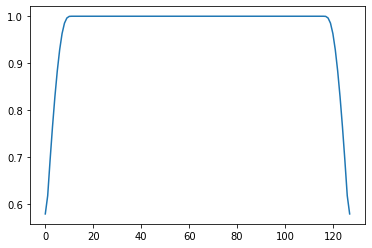

In [41]:
plt.figure()
plt.plot(s)

/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_MaxPool4.npy


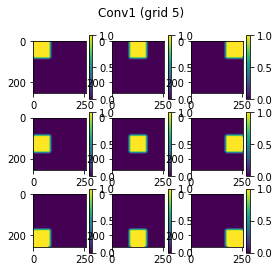

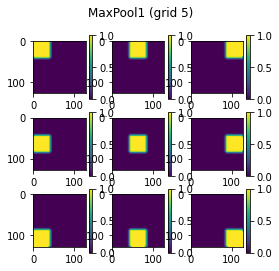

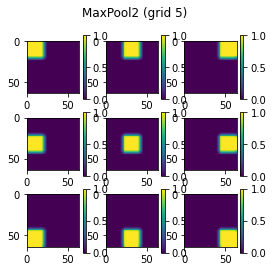

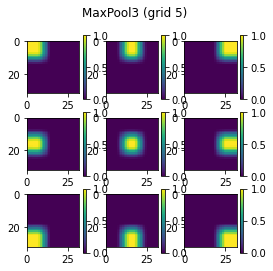

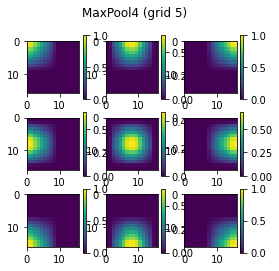

In [29]:
# for which_grid in [1,2,3,4]:
# for which_grid in [4]:
for which_grid in [5]:

    n_grid_eachside=3;

    overlap_each_layer = []

    for ll in range(n_layers):

        fn = os.path.join(root,'grid_overlap','vgg19_gridoverlap_grid%d_%dx%d_%s.npy'%(which_grid,
                                                                               n_grid_eachside, \
                                                                        n_grid_eachside, layer_names[ll]))
        print(fn)
        overlap = np.load(fn)
        overlap_each_layer.append(overlap)

    # for ll in [1]:
        
    for ll in range(n_layers):

        overlap = overlap_each_layer[ll]

        res = res_each_layer[ll]

        plt.figure(figsize=(4,4))
        gt = 0;
        for gx in range(n_grid_eachside):
            for gy in range(n_grid_eachside):

                overlap_view = np.reshape(overlap[gt,:], [res,res])
                plt.subplot(n_grid_eachside, n_grid_eachside, gt+1)
                plt.pcolormesh(overlap_view)
                plt.axis('square')
                # plt.axis('off')
                plt.gca().invert_yaxis()
                gt+=1
                plt.colorbar()

        plt.suptitle('%s (grid %d)'%(layer_names[ll], which_grid))

/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_3x3_MaxPool4.npy


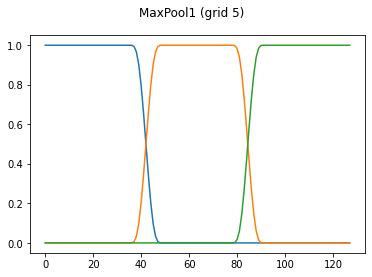

In [31]:
for which_grid in [5]:
    

    n_grid_eachside=3;

    overlap_each_layer = []

    for ll in range(n_layers):

        fn = os.path.join(root,'grid_overlap','vgg19_gridoverlap_grid%d_%dx%d_%s.npy'%(which_grid,
                                                                               n_grid_eachside, \
                                                                        n_grid_eachside, layer_names[ll]))
        print(fn)
        overlap = np.load(fn)
        overlap_each_layer.append(overlap)

    centers = [int(res / 6 * 3) for res in res_each_layer]

    for ll in [1]:

        overlap = overlap_each_layer[ll]
        res = res_each_layer[ll]

        inds = [3,4,5]

        plt.figure()

        for ii in inds:

            overlap_view = np.reshape(overlap[ii,:], [res,res])

            # plt.plot(overlap_view[30,:])
            plt.plot(overlap_view[centers[ll],:])
  
        plt.suptitle('%s (grid %d)'%(layer_names[ll], which_grid))

/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_2x2_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_2x2_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_2x2_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_2x2_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid5_2x2_MaxPool4.npy


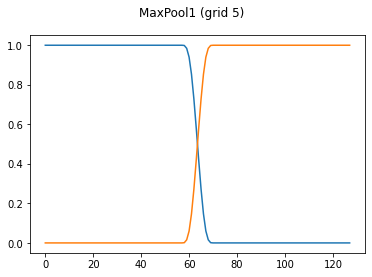

In [27]:
for which_grid in [5]:
    

    n_grid_eachside=2;

    overlap_each_layer = []

    for ll in range(n_layers):

        fn = os.path.join(root,'grid_overlap','vgg19_gridoverlap_grid%d_%dx%d_%s.npy'%(which_grid,
                                                                               n_grid_eachside, \
                                                                        n_grid_eachside, layer_names[ll]))
        print(fn)
        overlap = np.load(fn)
        overlap_each_layer.append(overlap)

    centers = [int(res / 4 * 3) for res in res_each_layer]

    for ll in [1]:

        overlap = overlap_each_layer[ll]
        res = res_each_layer[ll]

        inds = [2,3]

        plt.figure()

        for ii in inds:

            overlap_view = np.reshape(overlap[ii,:], [res,res])

            # plt.plot(overlap_view[30,:])
            plt.plot(overlap_view[centers[ll],:])
  
        plt.suptitle('%s (grid %d)'%(layer_names[ll], which_grid))

In [24]:
res

128

/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool4.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_MaxPool4.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid3_4x4_Conv1.n

FileNotFoundError: [Errno 2] No such file or directory: '/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid4_4x4_Conv1.npy'

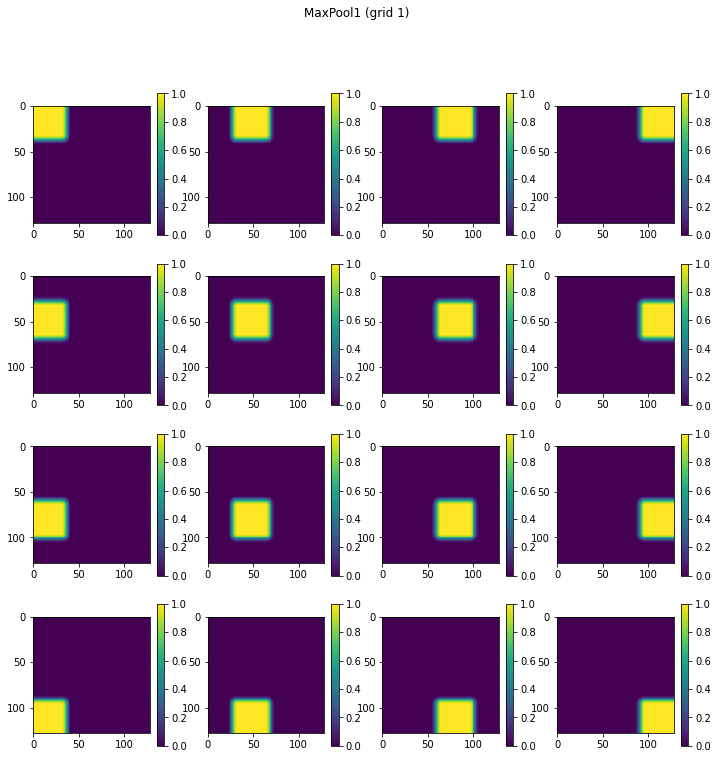

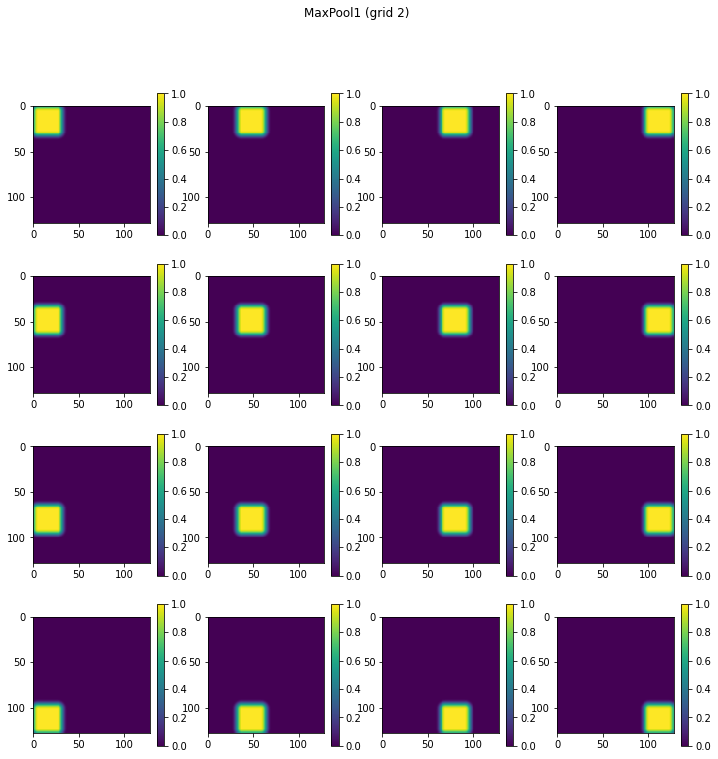

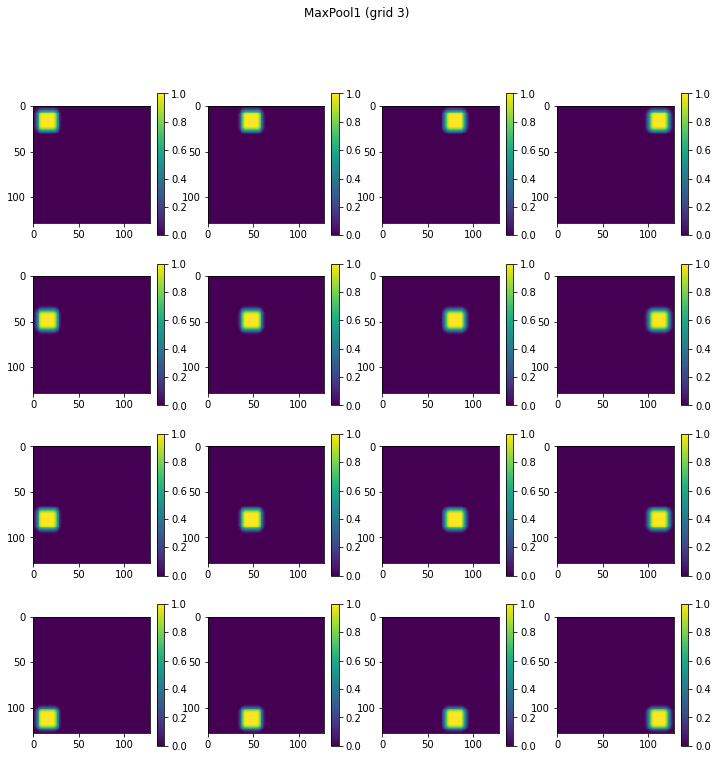

In [14]:
for which_grid in [1,2,3, 4]:
    

    n_grid_eachside=4;

    overlap_each_layer = []

    for ll in range(n_layers):

        fn = os.path.join(root,'grid_overlap','vgg19_gridoverlap_grid%d_%dx%d_%s.npy'%(which_grid,
                                                                               n_grid_eachside, \
                                                                        n_grid_eachside, layer_names[ll]))
        print(fn)
        overlap = np.load(fn)
        overlap_each_layer.append(overlap)

    for ll in [1]:
        
    # for ll in range(n_layers):

        overlap = overlap_each_layer[ll]

        res = res_each_layer[ll]

        plt.figure(figsize=(12,12))
        gt = 0;
        for gx in range(n_grid_eachside):
            for gy in range(n_grid_eachside):

                overlap_view = np.reshape(overlap[gt,:], [res,res])
                plt.subplot(n_grid_eachside, n_grid_eachside, gt+1)
                plt.pcolormesh(overlap_view)
                plt.axis('square')
                # plt.axis('off')
                plt.gca().invert_yaxis()
                gt+=1
                plt.colorbar()

        plt.suptitle('%s (grid %d)'%(layer_names[ll], which_grid))

/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool4.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_4x4_MaxPool4.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid3_4x4_Conv1.n

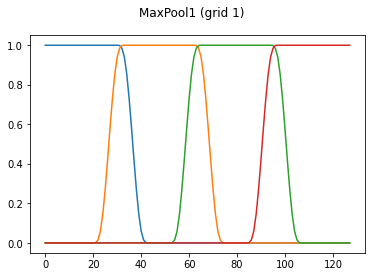

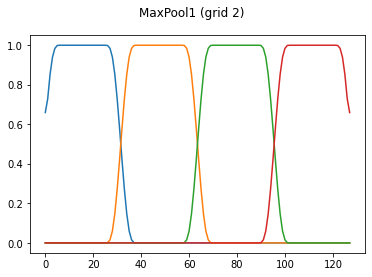

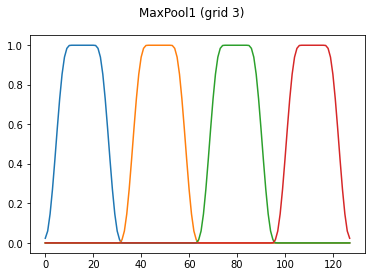

In [160]:
for which_grid in [1,2,3]:
    

    n_grid_eachside=4;

    overlap_each_layer = []

    for ll in range(n_layers):

        fn = os.path.join(root,'grid_overlap','vgg19_gridoverlap_grid%d_%dx%d_%s.npy'%(which_grid,
                                                                               n_grid_eachside, \
                                                                        n_grid_eachside, layer_names[ll]))
        print(fn)
        overlap = np.load(fn)
        overlap_each_layer.append(overlap)

    centers = [int(res / 8 * 3) for res in res_each_layer]

    for ll in [1]:

        overlap = overlap_each_layer[ll]
        res = res_each_layer[ll]

        inds = [4,5,6,7]

        plt.figure()

        for ii in inds:

            overlap_view = np.reshape(overlap[ii,:], [res,res])

            # plt.plot(overlap_view[30,:])
            plt.plot(overlap_view[centers[ll],:])
  
        plt.suptitle('%s (grid %d)'%(layer_names[ll], which_grid))

/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid1_4x4_MaxPool4.npy


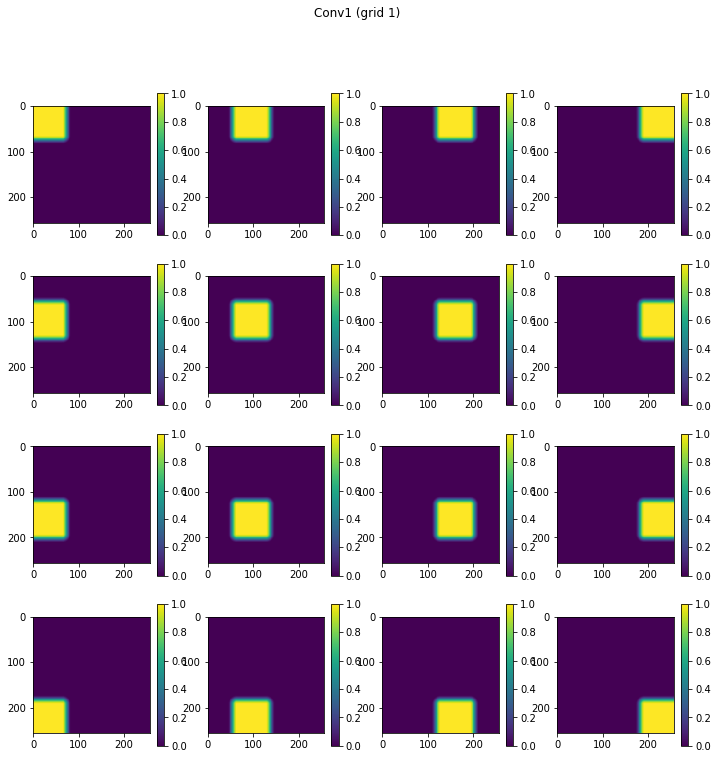

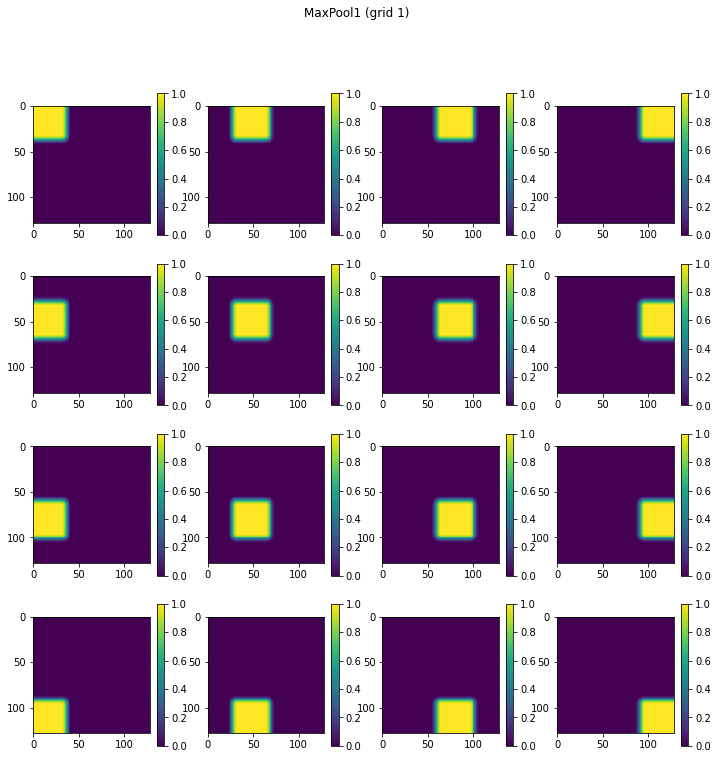

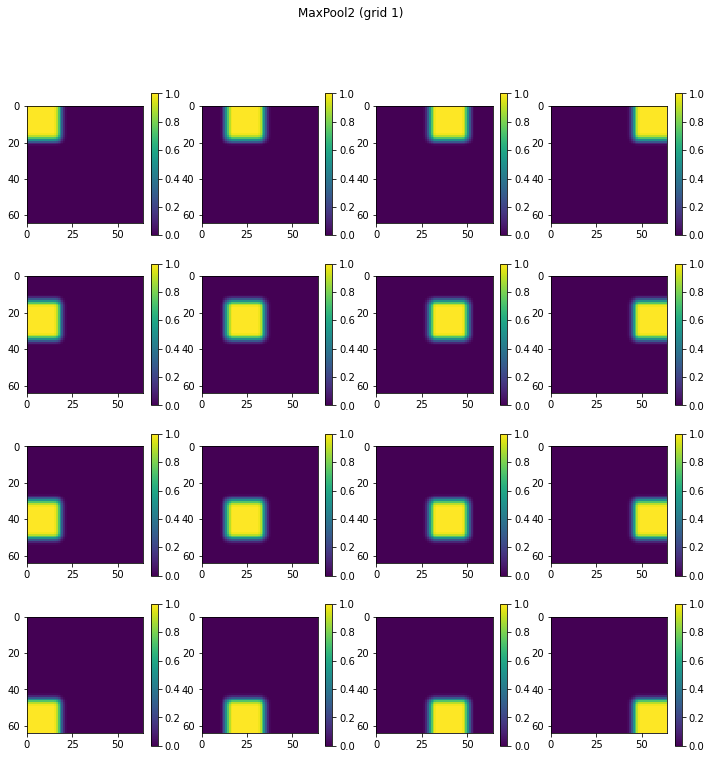

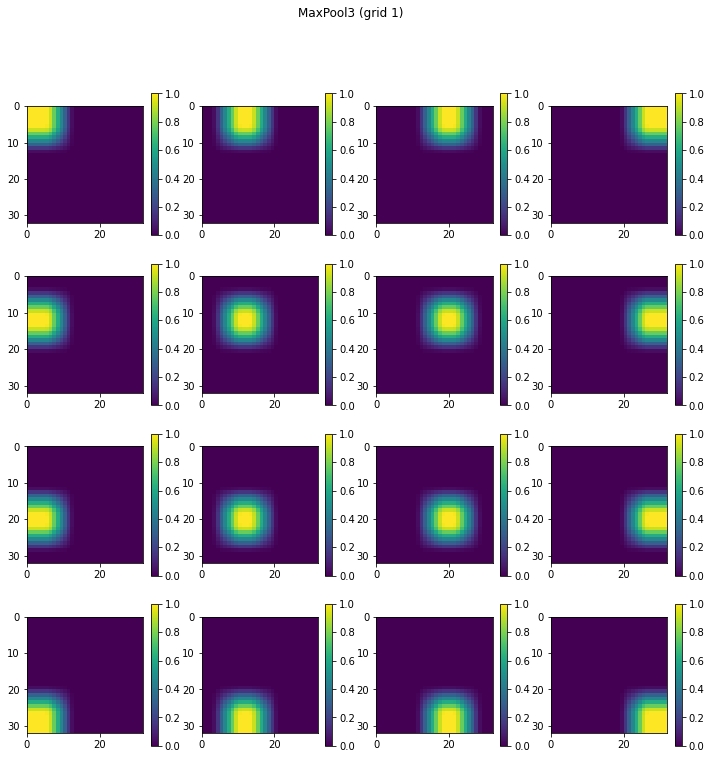

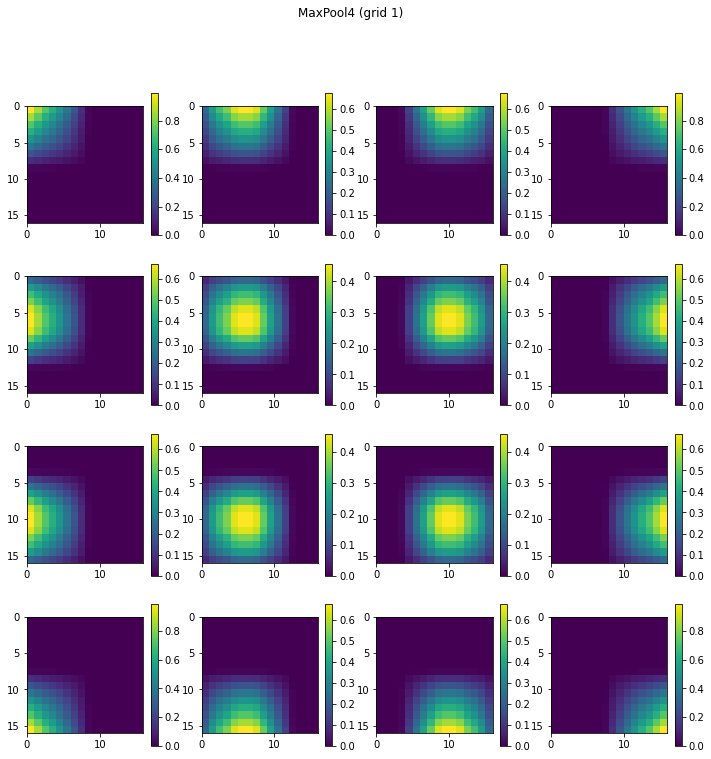

In [161]:
which_grid = 1;


n_grid_eachside=4;

overlap_each_layer = []

for ll in range(n_layers):

    fn = os.path.join(root,'grid_overlap','vgg19_gridoverlap_grid%d_%dx%d_%s.npy'%(which_grid,
                                                                           n_grid_eachside, \
                                                                    n_grid_eachside, layer_names[ll]))
    print(fn)
    overlap = np.load(fn)
    overlap_each_layer.append(overlap)

# for ll in [1]:

for ll in range(n_layers):

    overlap = overlap_each_layer[ll]

    res = res_each_layer[ll]

    plt.figure(figsize=(12,12))
    gt = 0;
    for gx in range(n_grid_eachside):
        for gy in range(n_grid_eachside):

            overlap_view = np.reshape(overlap[gt,:], [res,res])
            plt.subplot(n_grid_eachside, n_grid_eachside, gt+1)
            plt.pcolormesh(overlap_view)
            plt.axis('square')
            # plt.axis('off')
            plt.gca().invert_yaxis()
            gt+=1
            plt.colorbar()

    plt.suptitle('%s (grid %d)'%(layer_names[ll], which_grid))

/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_1x1_Conv1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_1x1_MaxPool1.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_1x1_MaxPool2.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_1x1_MaxPool3.npy
/user_data/mmhender/texture_synthesis/grid_overlap/vgg19_gridoverlap_grid2_1x1_MaxPool4.npy


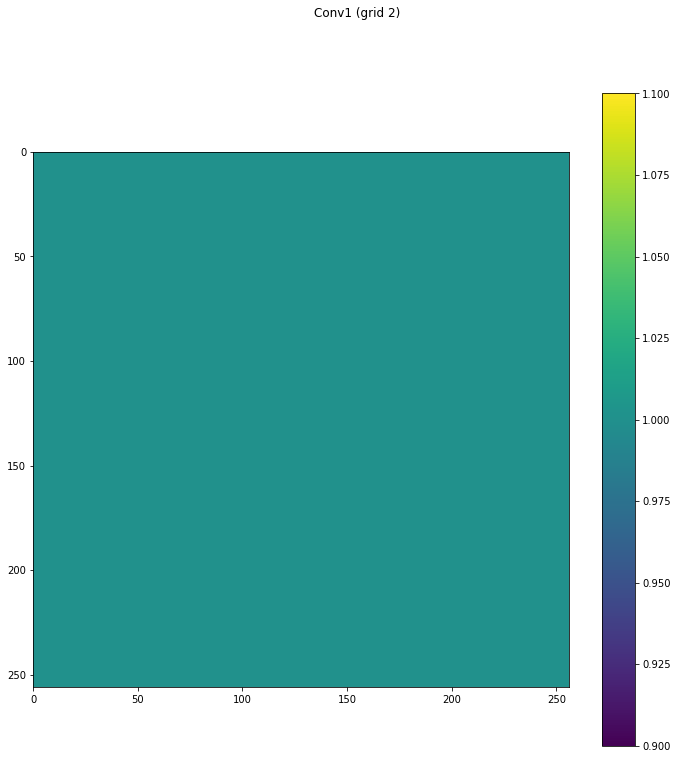

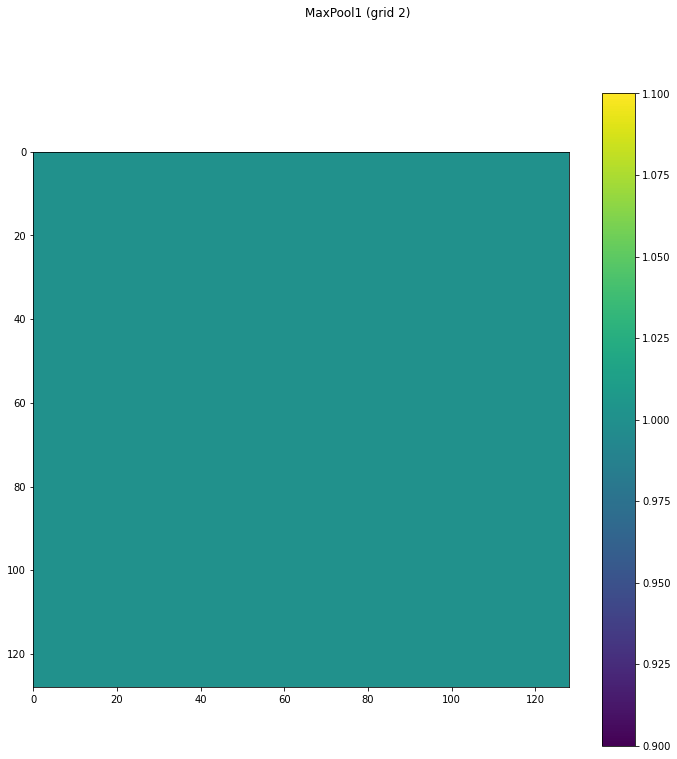

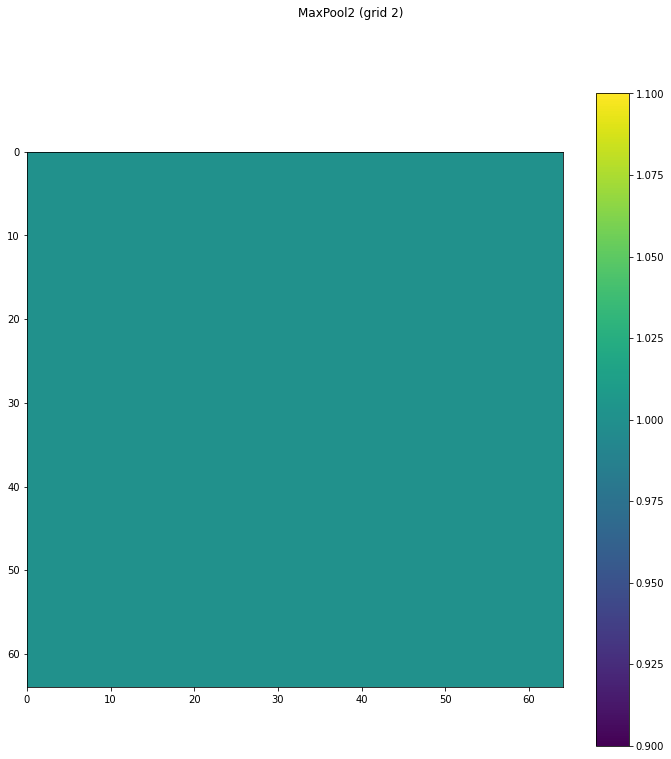

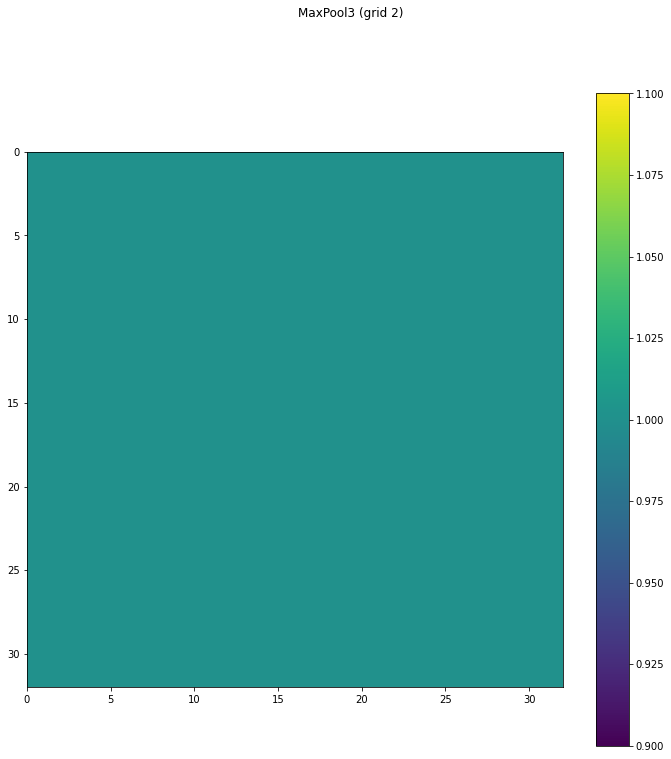

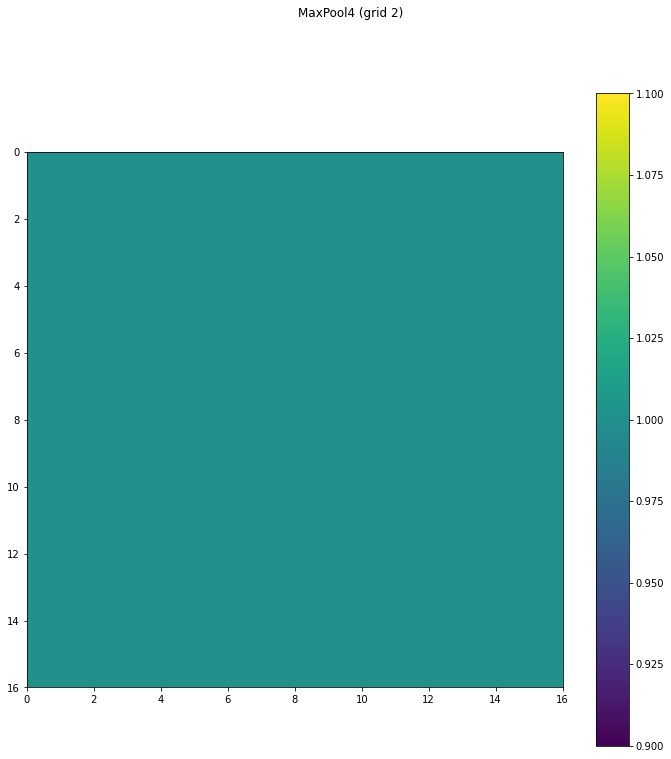

In [163]:
which_grid = 2;

n_grid_eachside=1;

overlap_each_layer = []

for ll in range(n_layers):

    fn = os.path.join(root,'grid_overlap','vgg19_gridoverlap_grid%d_%dx%d_%s.npy'%(which_grid,
                                                                           n_grid_eachside, \
                                                                    n_grid_eachside, layer_names[ll]))
    print(fn)
    overlap = np.load(fn)
    overlap_each_layer.append(overlap)

# for ll in [1]:

for ll in range(n_layers):

    overlap = overlap_each_layer[ll]

    res = res_each_layer[ll]

    plt.figure(figsize=(12,12))
    gt = 0;
    for gx in range(n_grid_eachside):
        for gy in range(n_grid_eachside):

            overlap_view = np.reshape(overlap[gt,:], [res,res])
            plt.subplot(n_grid_eachside, n_grid_eachside, gt+1)
            plt.pcolormesh(overlap_view)
            plt.axis('square')
            # plt.axis('off')
            plt.gca().invert_yaxis()
            gt+=1
            plt.colorbar()

    plt.suptitle('%s (grid %d)'%(layer_names[ll], which_grid))